In [114]:
import pandas as pd
import numpy as np

df = pd.read_csv('./stations_day_dataset.csv')
df.head()
df.isnull().sum().sort_values(ascending=False)

NH3                     28310
PM10                    24885
Toluene                 24126
Benzene                 17514
SO2                      9562
O3                       7640
NOx                      3752
CO                       2950
AQI_Bucket               2873
AQI                      2873
NO                       2074
NO2                      1402
location                    0
temperature_2m              0
industry_distance           0
relative_humidity_2m        0
river_distance              0
road_distance               0
longitude                   0
latitude                    0
Unnamed: 0                  0
FullAddress                 0
State                       0
City                        0
StationName                 0
StationId                   0
PM2.5                       0
Date                        0
windspeed_10m               0
dtype: int64

In [115]:
original_df = df
original_df.columns

Index(['Unnamed: 0', 'StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'FullAddress', 'location', 'latitude',
       'longitude', 'road_distance', 'river_distance', 'industry_distance',
       'temperature_2m', 'relative_humidity_2m', 'windspeed_10m'],
      dtype='object')

In [116]:
df.columns

Index(['Unnamed: 0', 'StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'FullAddress', 'location', 'latitude',
       'longitude', 'road_distance', 'river_distance', 'industry_distance',
       'temperature_2m', 'relative_humidity_2m', 'windspeed_10m'],
      dtype='object')

In [117]:
import numpy as np
import pandas as pd

def impute_strategy(df):
    result = []
    for station_id,group in df.groupby('StationId'):
        numeric_columns = group.select_dtypes(include='number').columns
        row_count = len(group)
        for col in numeric_columns:
            null_count = group[col].isnull().sum()
            null_pct = null_count / row_count
            if null_count == row_count:
                skew = np.nan
            else:
                skew = group[col].dropna().skew()
            result.append({
                'StationId': station_id,
                'Column': col,
                'Nulls': null_count,
                'TotalRows': row_count,
                'NullPct': null_pct,
                'Skew': skew
            })
    return pd.DataFrame(result)
summary_df = impute_strategy(df)

In [118]:
import pandas as pd
import numpy as np

def impute_values_station_wise(df):
    for station_id,group in df.groupby('StationId'):
        numeric_columns = group.select_dtypes(include='number').columns
        row_count = len(group)
        for col in numeric_columns:
            null_count_col = group[col].isnull().sum()
            null_pct =  null_count_col/row_count
            
            if null_pct <= 0.5:
                skew_value = group[col].dropna().skew()
                if skew_value > 0.5 or skew_value < -0.5:
                    df.loc[group.index,col] = group[col].fillna(group[col].median())
                else:
                    df.loc[group.index,col] = group[col].fillna(group[col].mean())
impute_values_station_wise(df)
df.isnull().sum().sort_values(ascending=False)

NH3                     26938
PM10                    23576
Toluene                 19290
Benzene                 12471
SO2                      7620
O3                       5629
AQI_Bucket               2873
NOx                      1063
NO                        684
CO                        435
longitude                   0
road_distance               0
river_distance              0
Unnamed: 0                  0
location                    0
industry_distance           0
temperature_2m              0
relative_humidity_2m        0
latitude                    0
AQI                         0
FullAddress                 0
State                       0
City                        0
StationName                 0
StationId                   0
NO2                         0
PM2.5                       0
Date                        0
windspeed_10m               0
dtype: int64

In [119]:
import pandas as pd
import numpy as np

def impute_values_city_wise(df):
    for City,group in df.groupby('City'):
        numeric_columns = group.select_dtypes(include='number').columns
        row_count = len(group)
        for col in numeric_columns:
            null_count_col = group[col].isnull().sum()
            null_pct =  null_count_col/row_count
            
            if null_pct <= 0.5:
                skew_value = group[col].dropna().skew()
                if skew_value > 0.5 or skew_value < -0.5:
                    df.loc[group.index,col] = group[col].fillna(group[col].median())
                else:
                    df.loc[group.index,col] = group[col].fillna(group[col].mean())
impute_values_city_wise(df)
df.isnull().sum().sort_values(ascending=False)

PM10                    18172
NH3                     12883
Toluene                  7565
AQI_Bucket               2873
Benzene                  2019
NOx                       379
CO                        225
O3                        158
latitude                    0
longitude                   0
Unnamed: 0                  0
road_distance               0
FullAddress                 0
river_distance              0
industry_distance           0
temperature_2m              0
relative_humidity_2m        0
location                    0
AQI                         0
State                       0
City                        0
StationName                 0
StationId                   0
SO2                         0
NO2                         0
NO                          0
PM2.5                       0
Date                        0
windspeed_10m               0
dtype: int64

In [120]:
import pandas as pd
import numpy as np

def impute_values_state_wise(df):
    for state,group in df.groupby('State'):
        numeric_columns = group.select_dtypes(include='number').columns
        row_count = len(group)
        for col in numeric_columns:
            null_count_col = group[col].isnull().sum()
            null_pct =  null_count_col/row_count
            
            if null_pct <= 0.5:
                skew_value = group[col].dropna().skew()
                if skew_value > 0.5 or skew_value < -0.5:
                    df.loc[group.index,col] = group[col].fillna(group[col].median())
                else:
                    df.loc[group.index,col] = group[col].fillna(group[col].mean())
impute_values_state_wise(df)
df.isnull().sum().sort_values(ascending=False)

PM10                    18172
NH3                     12883
Toluene                  7565
AQI_Bucket               2873
Benzene                  2019
NOx                       379
CO                        225
longitude                   0
location                    0
latitude                    0
Unnamed: 0                  0
road_distance               0
State                       0
river_distance              0
industry_distance           0
temperature_2m              0
relative_humidity_2m        0
FullAddress                 0
AQI                         0
City                        0
StationName                 0
StationId                   0
O3                          0
SO2                         0
NO2                         0
NO                          0
PM2.5                       0
Date                        0
windspeed_10m               0
dtype: int64

In [121]:
## Impute remanining values with rest of median or mean based on skew value

numeric_columns = df.select_dtypes(include='number').columns

for col in numeric_columns:
    skew = df[col].dropna().skew()
    if skew > 0.5 or skew < -0.5:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mean())
df.isnull().sum().sort_values(ascending=False)
df.to_csv('./stations_cleaned.csv')
df.columns

Index(['Unnamed: 0', 'StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'FullAddress', 'location', 'latitude',
       'longitude', 'road_distance', 'river_distance', 'industry_distance',
       'temperature_2m', 'relative_humidity_2m', 'windspeed_10m'],
      dtype='object')

In [122]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
monthly_average_pm = df.groupby(['Month'])['PM2.5'].mean().reset_index()
monthly_average_pm.columns = ['Month', 'Avg_PM2.5']
monthly_average_pm.sort_values(by='Avg_PM2.5', ascending=False)
def get_season(month):
    if month in [10,11,12,1,2]:
        return "Winter"
    if month in [3,4,5]:
        return "Summer"
    if month in [6,7,8,9]:
        return "Rainy"
df['Season'] = df['Month'].apply(get_season)
df.columns

Index(['Unnamed: 0', 'StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'FullAddress', 'location', 'latitude',
       'longitude', 'road_distance', 'river_distance', 'industry_distance',
       'temperature_2m', 'relative_humidity_2m', 'windspeed_10m', 'Month',
       'Season'],
      dtype='object')

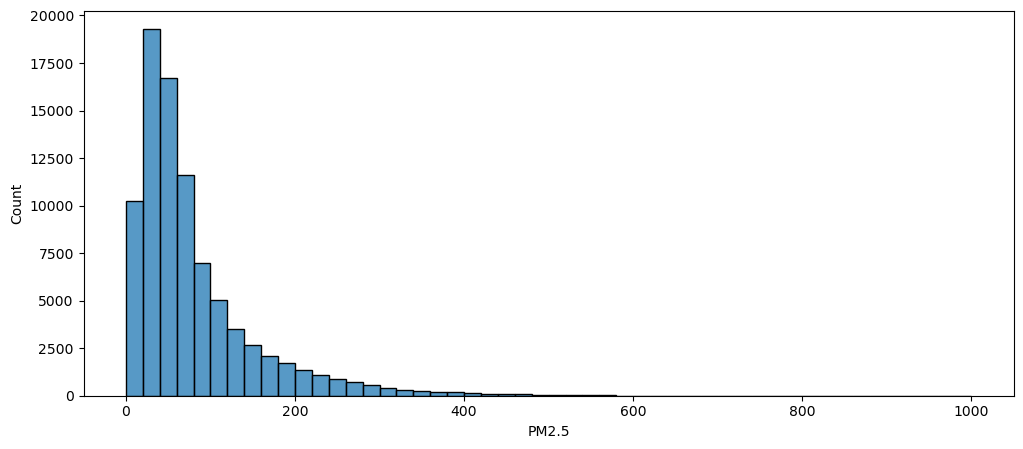

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.histplot(data=df,x='PM2.5',bins=50)
plt.show()

    Month       PM2.5
0       1  131.171241
1       2   97.176967
2       3   66.871787
3       4   59.678194
4       5   59.881867
5       6   48.195977
6       7   37.761769
7       8   33.609366
8       9   38.084005
9      10   91.069636
10     11  144.562806
11     12  144.141188


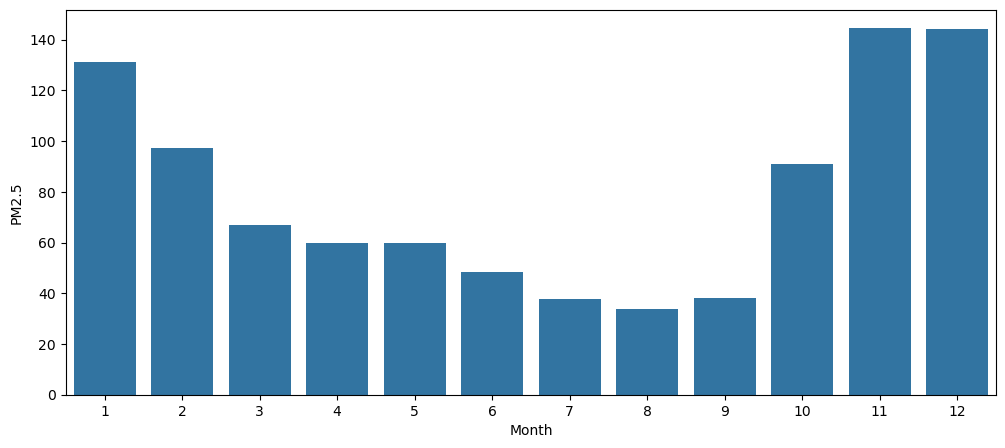

In [101]:
plt.figure(figsize=(12,5))
monthly_avg_pm = df.groupby('Month')['PM2.5'].mean().reset_index()
print(monthly_avg_pm)
sns.barplot(data=monthly_avg_pm,x='Month',y='PM2.5')
plt.show()

   Season       PM2.5
0   Rainy   40.174348
1  Summer   62.183153
2  Winter  121.947414


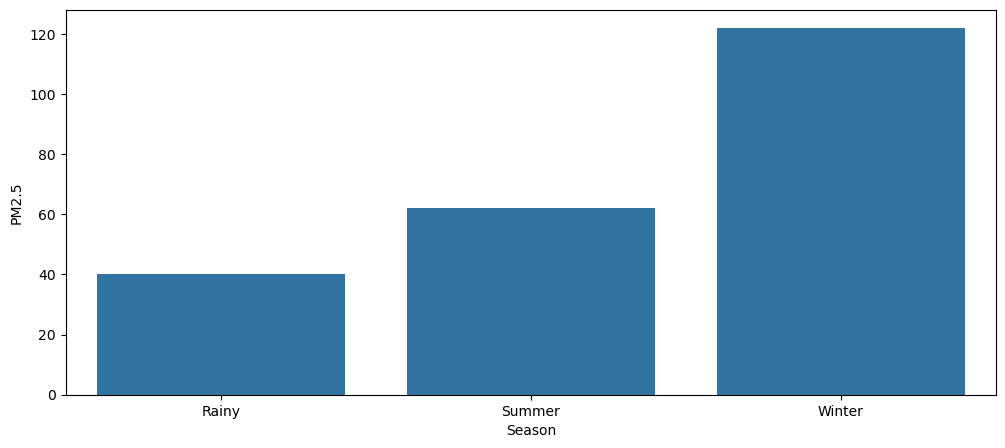

In [102]:
plt.figure(figsize=(12,5))
season_avg_pm = df.groupby('Season')['PM2.5'].mean().reset_index()
print(season_avg_pm)
sns.barplot(data=season_avg_pm,x='Season',y='PM2.5')
plt.show()

<Axes: xlabel='Day', ylabel='PM2.5'>

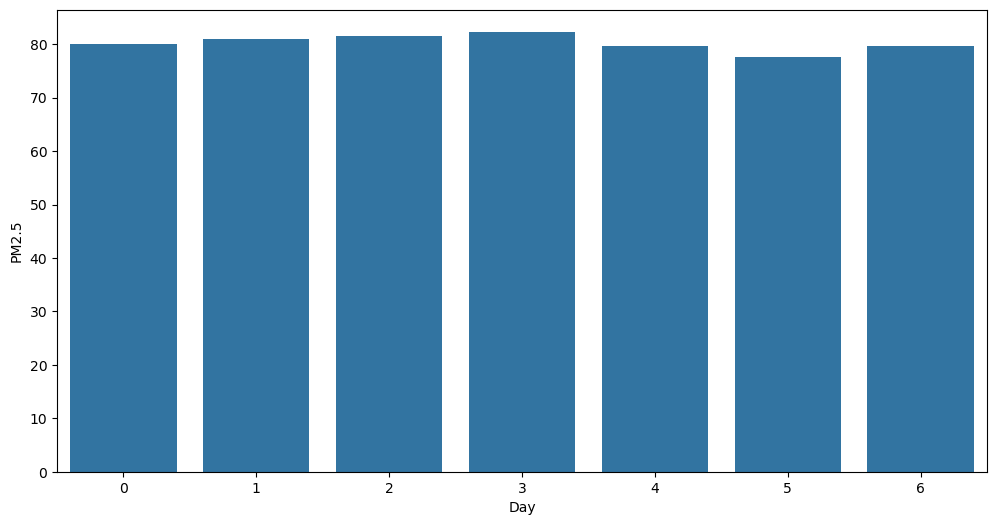

In [103]:
df['Day'] = pd.to_datetime(df['Date']).dt.dayofweek
daily_avg_pm = df.groupby('Day')['PM2.5'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=daily_avg_pm,x='Day',y='PM2.5')

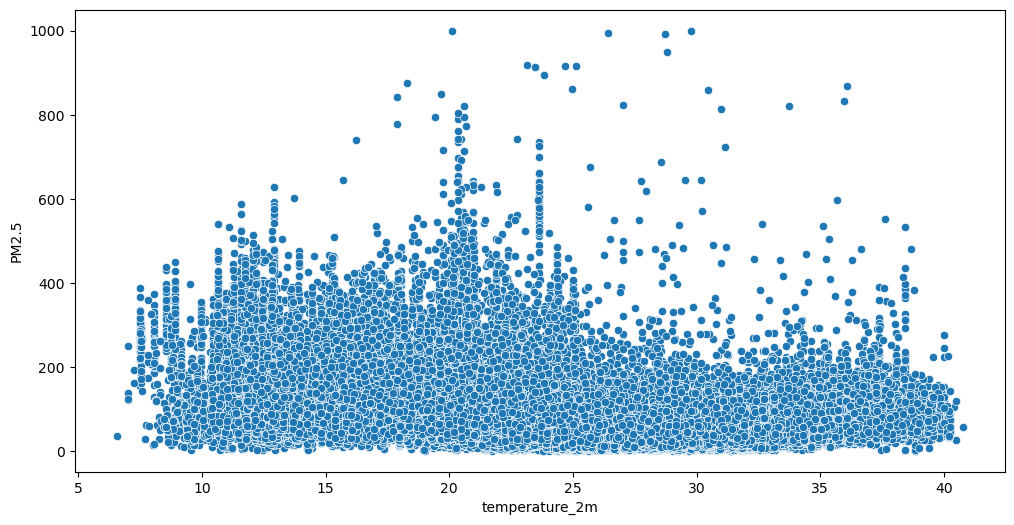

In [104]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='temperature_2m',y='PM2.5')
plt.show()

In [123]:
from scipy.stats import zscore

df['PM2.5_zscore'] = zscore(df['PM2.5'])
df['PM2.5_outlier_flag'] = df['PM2.5_zscore'].abs() > 3
(df['PM2.5_outlier_flag'] == True).sum()

1791

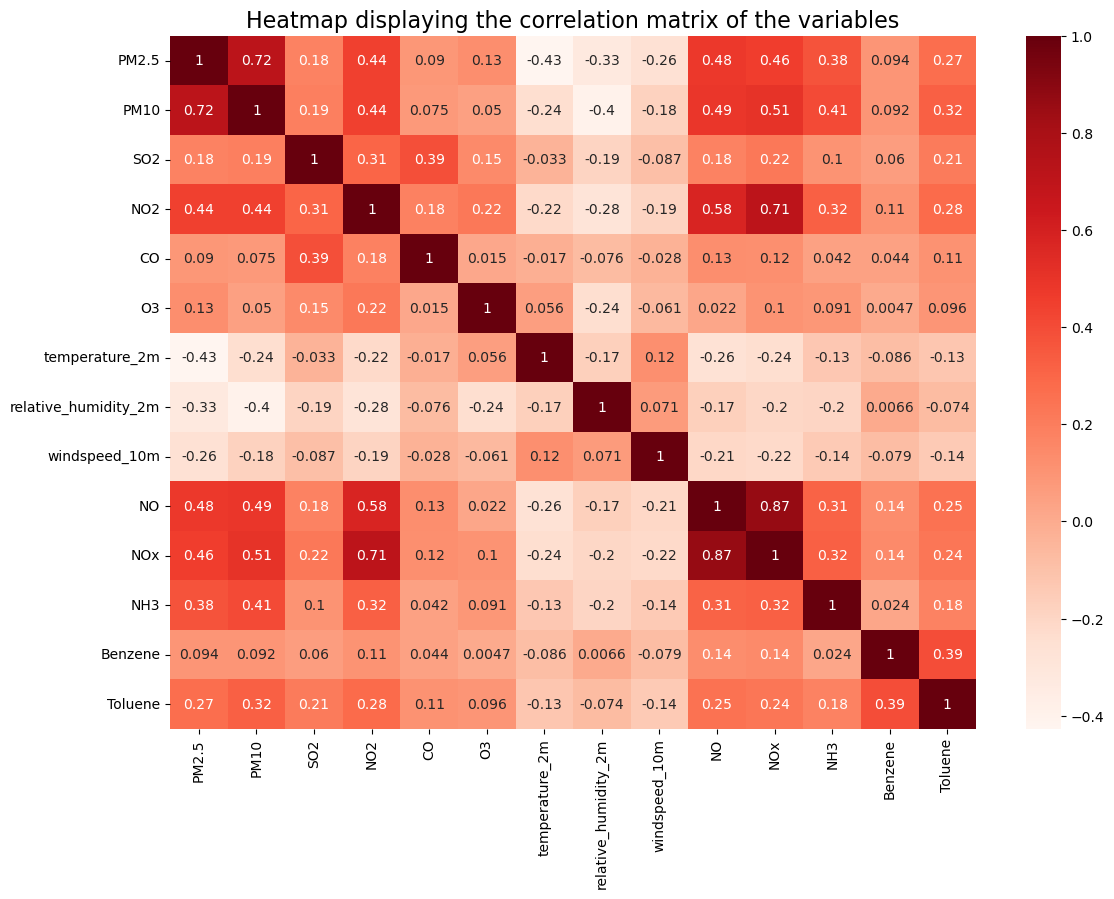

In [106]:
df.columns
plt.figure(figsize=(13,9))
correlation_data = df[['PM2.5', 'PM10', 'SO2', 'NO2',
                         'CO', 'O3', 'temperature_2m', 'relative_humidity_2m',
                         'windspeed_10m', 'NO', 'NOx','NH3','Benzene','Toluene']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [112]:
df['PM2.5_outlier_flag'] = df['PM2.5_outlier_flag'].astype(int)

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'road_distance', 'river_distance',
       'industry_distance', 'temperature_2m', 'relative_humidity_2m',
       'windspeed_10m', 'PM2.5_outlier_flag', 'City_Aizawl', 'City_Amaravati',
       'City_Amritsar', 'City_Bengaluru', 'City_Bhopal', 'City_Brajrajnagar',
       'City_Chandigarh', 'City_Chennai', 'City_Coimbatore', 'City_Delhi',
       'City_Ernakulam', 'City_Gurugram', 'City_Guwahati', 'City_Hyderabad',
       'City_Jaipur', 'City_Jorapokhar', 'City_Kochi', 'City_Kolkata',
       'City_Lucknow', 'City_Mumbai', 'City_Patna', 'City_Shillong',
       'City_Talcher', 'City_Thiruvananthapuram', 'City_Visakhapatnam',
       'Season_Summer', 'Season_Winter'],
      dtype='object')

In [108]:
df.drop(columns=['AQI','AQI_Bucket','Unnamed: 0','FullAddress','StationName','FullAddress','StationId','location','longitude','latitude','Month','Date','State','PM2.5_flagged','Day','PM2.5_zscore'],inplace=True,errors='ignore')
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'City', 'road_distance', 'river_distance',
       'industry_distance', 'temperature_2m', 'relative_humidity_2m',
       'windspeed_10m', 'Season', 'PM2.5_outlier_flag'],
      dtype='object')

In [109]:
df_encoded = pd.get_dummies(df,columns=['City','Season'],drop_first=True)
df_encoded['PM2.5_outlier_flag'].head(1)

0    0
Name: PM2.5_outlier_flag, dtype: int32

In [110]:
# df_encoded.to_csv('./stations_encoded.csv',index=False)
# df_encoded

# Model Training and Evaluation

In [124]:
df = df_encoded
original_df.columns

Index(['Unnamed: 0', 'StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket',
       'StationName', 'City', 'State', 'FullAddress', 'location', 'latitude',
       'longitude', 'road_distance', 'river_distance', 'industry_distance',
       'temperature_2m', 'relative_humidity_2m', 'windspeed_10m', 'Month',
       'Season', 'PM2.5_zscore', 'PM2.5_outlier_flag'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.columns)  
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['PM2.5']].sort_values(by='PM2.5', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with PM2.5')
plt.show()
# df.drop(columns=['road_distance','river_distance','industry_distance'],inplace=True)

In [72]:
X = df.drop(columns=['PM2.5'])
y = df['PM2.5']

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = X.select_dtypes(include='number').columns
categorical_columns = X.drop(columns=numeric_columns)
scaled_array = scaler.fit_transform(X[numeric_columns])
scaled_numeric_X = pd.DataFrame(scaled_array, columns=numeric_columns, index=X.index)
df = pd.concat([categorical_columns,scaled_numeric_X],axis=1)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print("PM2.5 mean:", y.mean())
print("PM2.5 std deviation:", y.std())

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree:")
print("R² Score:", r2_score(y_test, y_pred_dt))
print("RMSE:", mean_squared_error(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [200, 100],
    'max_depth': [30, 20],
    'min_samples_split': [2, 5],
    'max_features': ['log2']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

y_pred_rf_best = best_rf.predict(X_test)

print("Best Random Forest:")
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred_rf_best))
print("RMSE:", mean_squared_error(y_test, y_pred_rf_best))
print("MAE:", mean_absolute_error(y_test, y_pred_rf_best))


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,root_mean_squared_error
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=12,          
    cv=2,               
    scoring='r2',
    random_state=42,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)

print("Random Forest (RandomizedSearchCV):")
print("Best Params:", random_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))


In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,root_mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=30,n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", root_mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest:
R² Score: 0.8950308241769108
RMSE: 24.411285779914447
MAE: 13.910725407183238


In [80]:
print(df.columns)


Index(['City_Aizawl', 'City_Amaravati', 'City_Amritsar', 'City_Bengaluru',
       'City_Bhopal', 'City_Brajrajnagar', 'City_Chandigarh', 'City_Chennai',
       'City_Coimbatore', 'City_Delhi', 'City_Ernakulam', 'City_Gurugram',
       'City_Guwahati', 'City_Hyderabad', 'City_Jaipur', 'City_Jorapokhar',
       'City_Kochi', 'City_Kolkata', 'City_Lucknow', 'City_Mumbai',
       'City_Patna', 'City_Shillong', 'City_Talcher',
       'City_Thiruvananthapuram', 'City_Visakhapatnam', 'Season_Summer',
       'Season_Winter', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'road_distance', 'river_distance',
       'industry_distance', 'temperature_2m', 'relative_humidity_2m',
       'windspeed_10m', 'PM2.5_outlier_flag'],
      dtype='object')


In [128]:
import folium
import pandas as pd

df_map = X_test.copy()
df_map['PM2.5_actual'] = y_test.values
df_map['PM2.5_predicted'] = y_pred_rf

df_map = df_map.merge(original_df[['latitude', 'longitude']], left_index=True, right_index=True)

df_grouped = df_map.groupby(['latitude', 'longitude']).agg({
    'PM2.5_actual': 'mean',
    'PM2.5_predicted': 'mean'
}).reset_index()

india_map = folium.Map(location=[28.6139, 77.2090], zoom_start=5)

for _, row in df_grouped.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        popup=f"Avg Actual: {row['PM2.5_actual']:.2f}\nAvg Predicted: {row['PM2.5_predicted']:.2f}",
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(india_map)

# Save map to HTML
india_map.save("india_pm25_station_averages.html")


In [130]:
import webbrowser
webbrowser.open("india_pm25_station_averages.html")

True

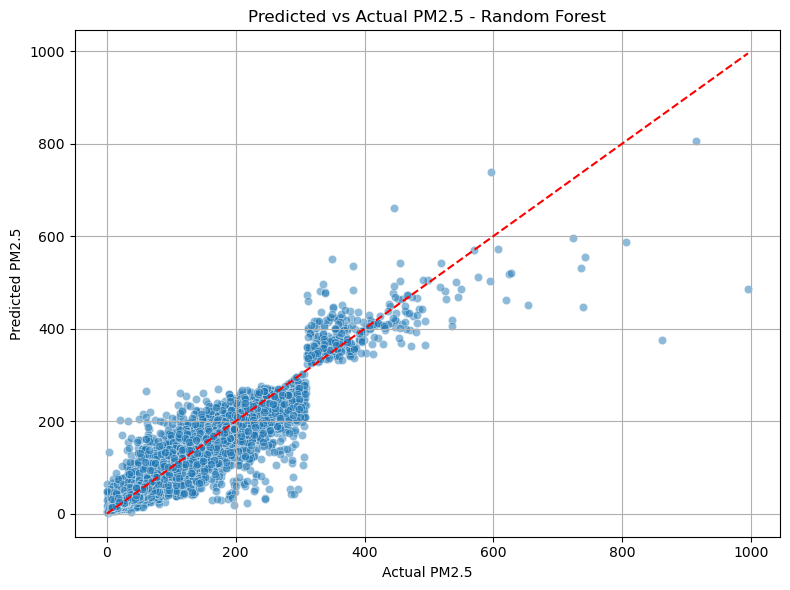

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Predicted vs Actual PM2.5 - Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()